# World population age

In [1]:
%matplotlib inline

import sys
import contextlib
if sys.version_info.major == 2:
    from urllib import urlopen, urlencode
else:
    from urllib.request import urlopen
    from urllib.parse import urlencode

import pandas as pd

URL = 'https://www.census.gov/population/international/data/idb/worldpop.php'
POST = {'popYears': 2014, 'submit': 'Submit: undefined'}

with contextlib.closing(urlopen(URL, urlencode(POST).encode('utf-8'))) as fd:
    df, = pd.read_html(fd.read(), encoding='ascii', skiprows=[1], attrs={'class': 'query_table'})

df['Age'] = df['Age'].replace('100 +', '100').astype(int)
df = df.set_index('Age')

df.info()
assert df.index.is_unique

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 4 columns):
Both Sexes Population    101 non-null int64
Male Population          101 non-null int64
Female Population        101 non-null int64
Sex Ratio                101 non-null float64
dtypes: float64(1), int64(3)
memory usage: 8.9 KB


## Total

In [2]:
total = df['Both Sexes Population'].sum()
total

7169968185

## Distribution

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,131139308,67771591,63367717,106.9
1,129127634,66732157,62395477,107.0
2,127798278,66082301,61715977,107.1
3,126634597,65510137,61124460,107.2
4,125711287,65042574,60668713,107.2
5,124991828,64682876,60308952,107.3
6,124274967,64328592,59946375,107.3
7,123060778,63707857,59352921,107.3
8,121818452,63067397,58751055,107.3


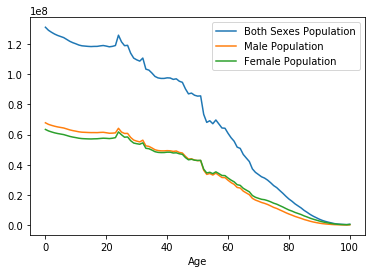

In [3]:
df[['Both Sexes Population', 'Male Population', 'Female Population']].plot()
df.head(30)

## Mode (top 10)

In [4]:
df.sort_values('Both Sexes Population', ascending=False).head(10)

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,131139308,67771591,63367717,106.9
1,129127634,66732157,62395477,107.0
2,127798278,66082301,61715977,107.1
3,126634597,65510137,61124460,107.2
24,125873724,64132737,61740987,103.9
4,125711287,65042574,60668713,107.2
5,124991828,64682876,60308952,107.3
6,124274967,64328592,59946375,107.3
7,123060778,63707857,59352921,107.3


## Mean

In [5]:
(df.index.values * df['Both Sexes Population']).sum() / float(total)

31.800738325172919

## Median

In [6]:
df[df['Both Sexes Population'].cumsum() >= total / 2][:1]

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
29,110673914,56327710,54346204,103.6
